In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.preprocessing import OrdinalEncoder
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
from sklearn.model_selection import train_test_split, KFold, GridSearchCV


from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet,Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

In [ ]:
train = pd.read_csv('../content/sample_data/Laptop.csv')
train.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,price,discount,rating,reviews
0,Lenovo,A6-9225,AMD,A6-9225 Processor,10th,4 GB GB,0 GB,1024 GB,24990,23.0,63.0,12
1,Lenovo,Ideapad,AMD,APU Dual,10th,4 GB GB,0 GB,512 GB,19590,8.0,1894.0,256
2,Avita,PURA,AMD,APU Dual,10th,4 GB GB,128 GB,0 GB,19990,28.0,1153.0,159
3,Avita,PURA,AMD,APU Dual,10th,4 GB GB,128 GB,0 GB,21490,23.0,1153.0,159
4,Avita,PURA,AMD,APU Dual,10th,4 GB GB,256 GB,0 GB,24990,25.0,1657.0,234


In [ ]:
train.shape

(896, 12)

In [ ]:
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total,percent],axis=1, keys=['Total','Percent', 'kk'])
missing_data.head(20)

,Total,Percent
rating,4,0.004464
discount,2,0.002232
brand,0,0.000000
model,0,0.000000
processor_name,0,0.000000
processor_brand,0,0.000000
processor_gnrtn,0,0.000000
ram_gb,0,0.000000
hdd,0,0.000000
ssd,0,0.000000


In [ ]:
train.describe()

,price,discount,rating,reviews
count,896.000000,894.000000,892.000000,896.000000
mean,76309.860491,18.569351,369.039238,46.152902
std,46613.354368,10.483560,1108.515362,136.079586
min,13990.000000,0.000000,0.000000,0.000000
25%,45490.000000,11.000000,0.000000,0.000000
50%,63494.000000,19.000000,19.000000,3.000000
75%,89090.000000,26.000000,181.500000,23.250000
max,441990.000000,57.000000,15279.000000,1947.000000


In [ ]:
train.columns

Index(['brand', 'model', 'processor_brand', 'processor_name',
       'processor_gnrtn', 'ram_gb', 'ssd', 'hdd', 'price', 'discount',
       'rating', 'reviews'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

lb = LabelEncoder()
train.drop(['brand'],axis=1, inplace = True)
train['model'] = lb.fit_transform(train['model'])
train['processor_brand'] = lb.fit_transform(train['processor_brand'])
train['processor_name'] = lb.fit_transform(train['processor_name'])
train['processor_gnrtn'] = lb.fit_transform(train['processor_gnrtn'])
train['ram_gb'] = lb.fit_transform(train['ram_gb'])

train['hdd'].fillna("No", inplace=True)
train['discount'].fillna("No", inplace=True)
mean_value = train['price'].mean()
train['price'].fillna(value=mean_value, inplace=True)
train['rating'] = lb.fit_transform(train['rating'])
train['hdd'] = lb.fit_transform(train['hdd'])
train['ssd'] = train['ssd'].astype(str).str.replace(' GB', '').astype(int)
train.head()

,brand,model,processor_brand,processor_name,processor_gnrtn,ram_gb,ssd,hdd,price,discount,rating,reviews
0,Lenovo,11,0,0,0,2,0,1,24990,23.0,59,12
1,Lenovo,59,0,1,0,2,0,3,19590,8.0,276,256
2,Avita,75,0,1,0,2,128,0,19990,28.0,247,159
3,Avita,75,0,1,0,2,128,0,21490,23.0,247,159
4,Avita,75,0,1,0,2,256,0,24990,25.0,268,234


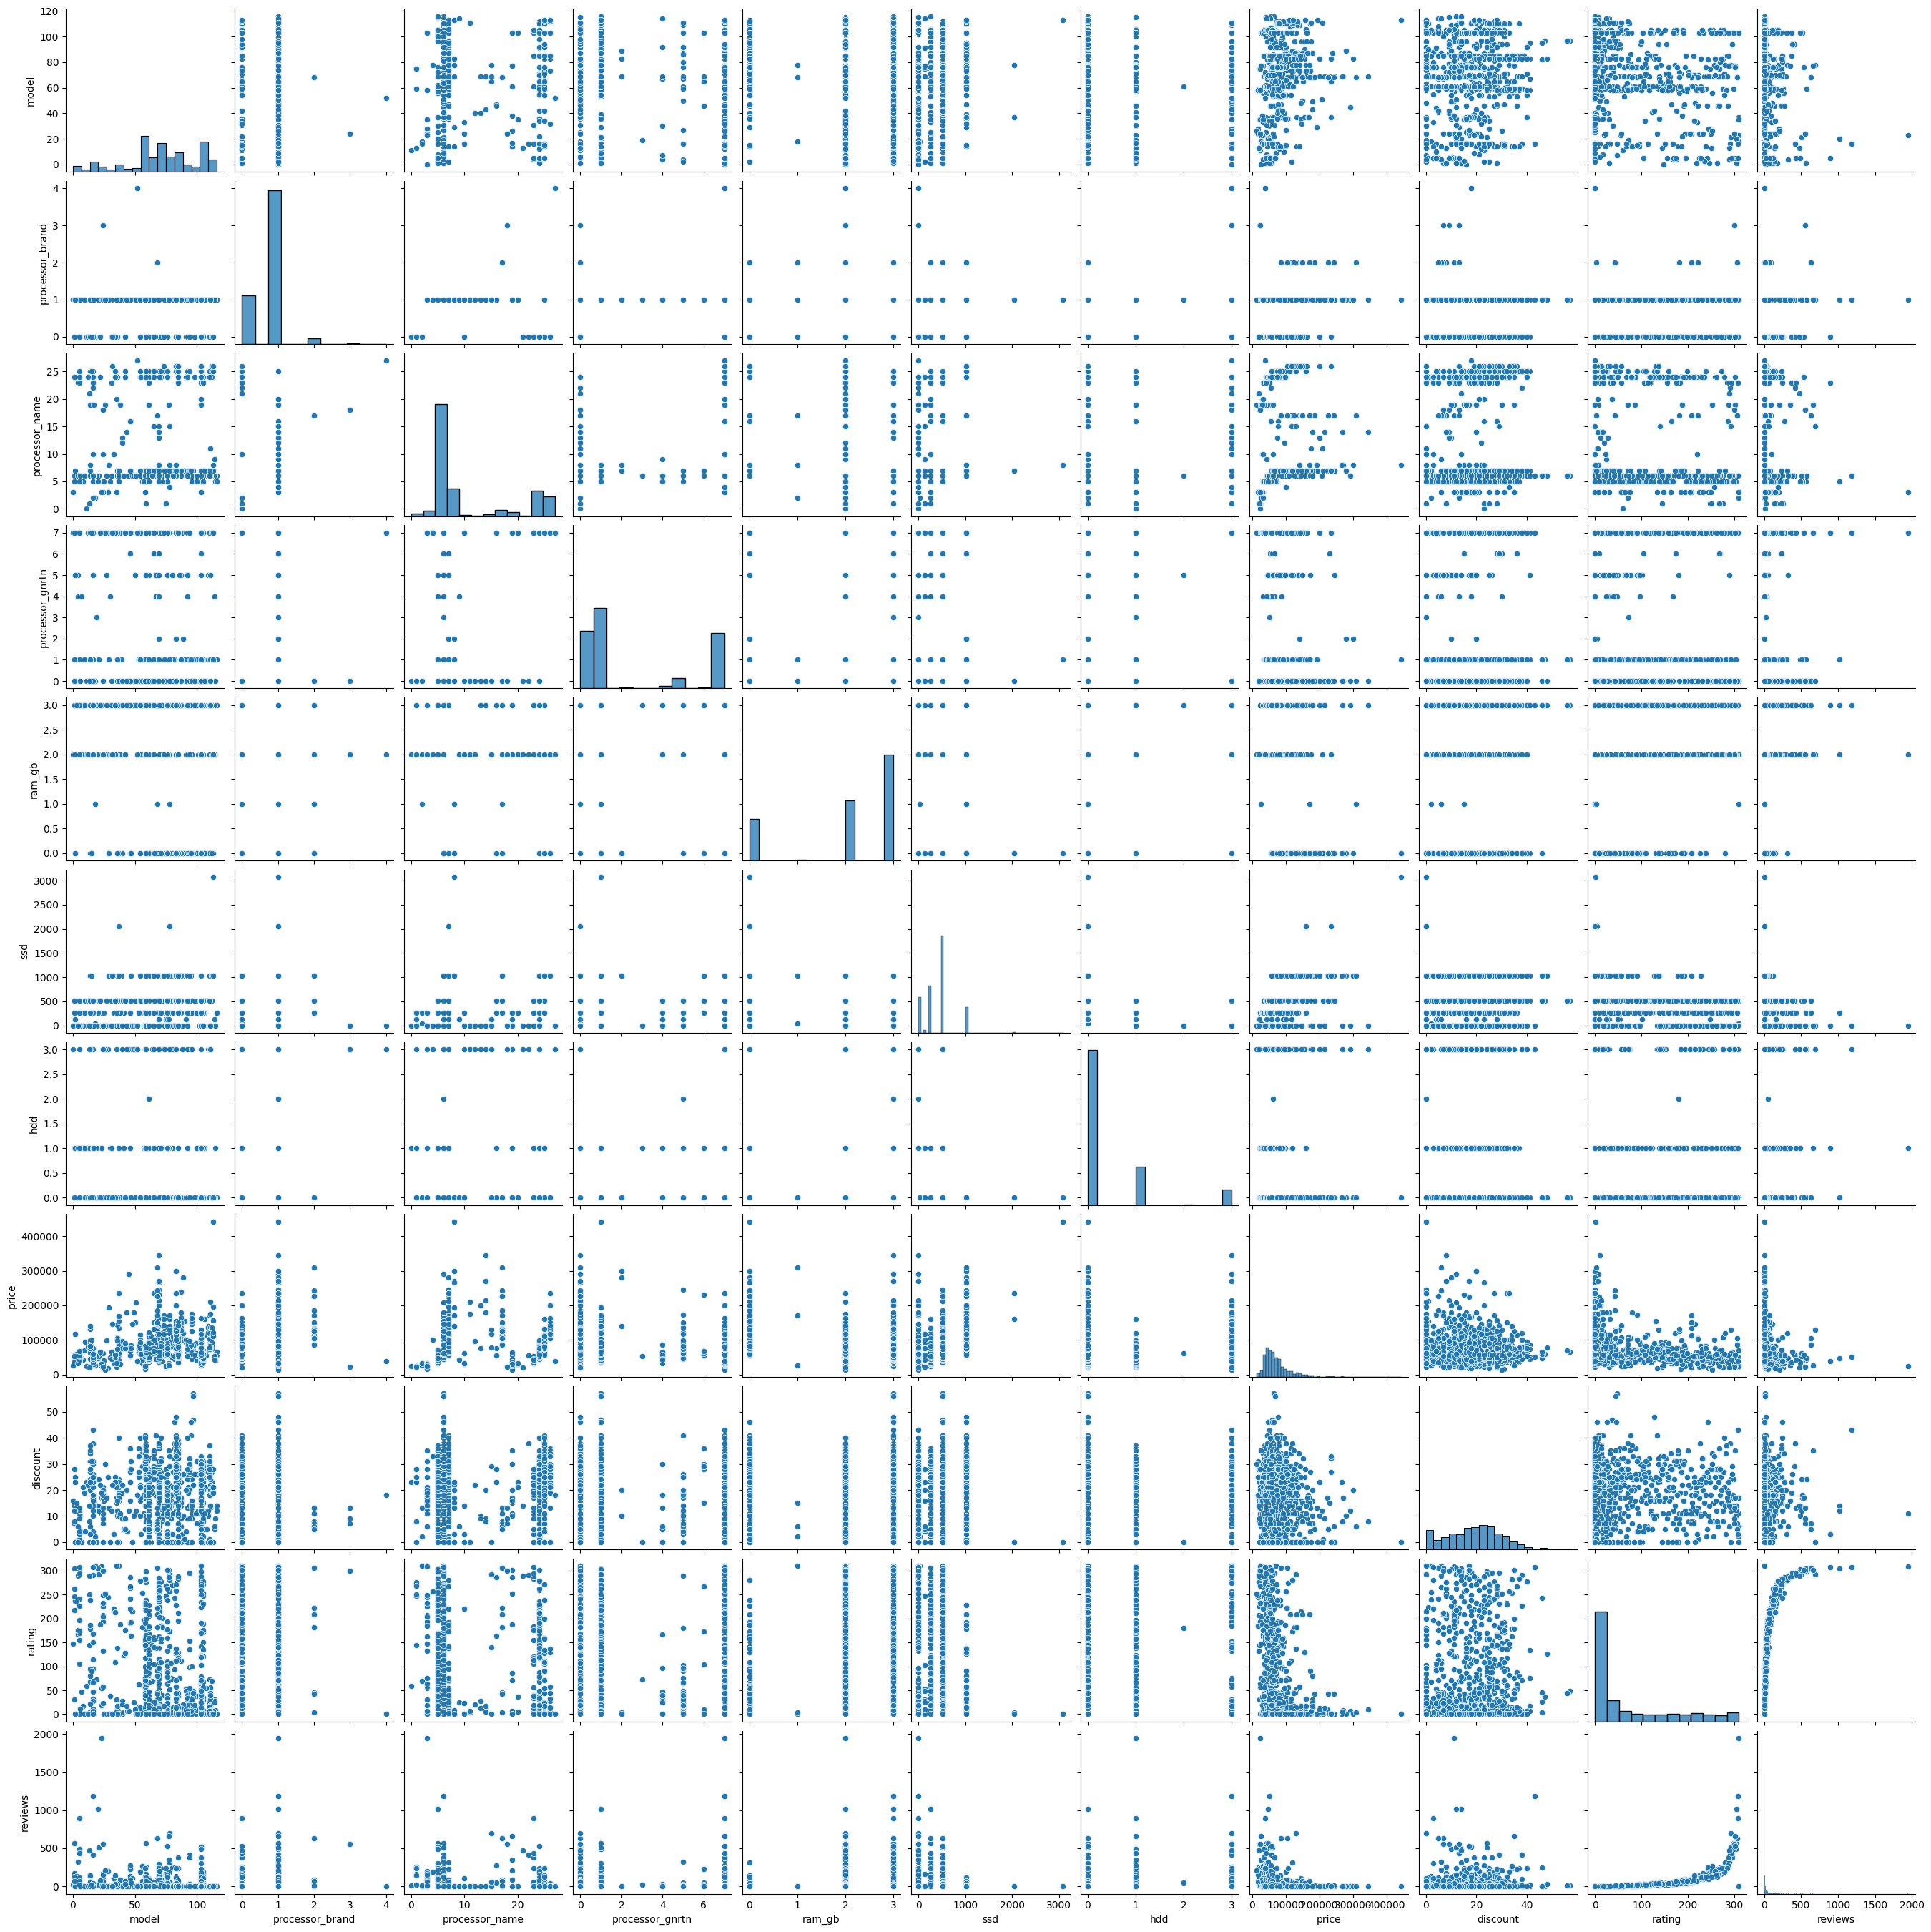

In [ ]:
import seaborn as sns

sns.pairplot(train)

<Axes: >

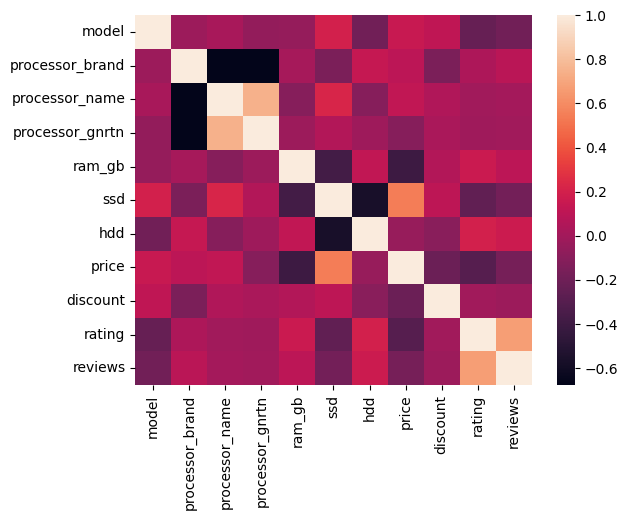

In [ ]:
train = train.drop(['brand'], axis=1)
train['ssd'] = train['ssd'].astype(str).str.replace(' GB', '').astype(int)
sns.heatmap(train.corr())

**train tes split**

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
y = train[['price']]
X = train.drop(['price'], axis=1)
std = StandardScaler()
X = std.fit_transform(X)
y = std.fit_transform(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Build WIth Tran Model**

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
ma = []
ms = []
mse = mean_squared_error
mae = mean_absolute_error

In [ ]:
def model_training_and_score(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(mse(y_pred, y_test))
    print(mae(y_pred, y_test))
    ms.append(mse(y_pred, y_test))
    ma.append(mse(y_pred, y_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, SGDRegressor, Ridge
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

model = RandomForestRegressor(n_estimators=5)
model_training_and_score(model)

0.2690973156360992
0.3127410521084159


In [ ]:
model = Lasso(alpha = 0.1)
model_training_and_score(model)

0.49864815102474586
0.4758840781557652


In [ ]:
model = SVR()
model_training_and_score(model)

0.34240818348125174
0.36101872855638706


In [ ]:
#
model = SGDRegressor()
model_training_and_score(model)

0.4014821823495429
0.45292425060684927


In [ ]:
kernel = DotProduct() + WhiteKernel()
model = GaussianProcessRegressor(kernel = kernel, random_state = 0)
model_training_and_score(model)

0.40469649245551254
0.4527339385502376


In [ ]:
#Decission Tree Regressor
model = DecisionTreeRegressor()
model_training_and_score(model)

0.4725204413421308
0.3792549564329153


In [ ]:
#K Neighbors Regressor
model = KNeighborsRegressor()
model_training_and_score(model)

0.40187466460389126
0.3966186406719926


In [ ]:

#Ridge Regression
model = Ridge(alpha=1)
model_training_and_score(model)

0.4065374401358476
0.45264309680198367


In [ ]:
#Model Optimization
#Model Selection

n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(start=10, stop=110, num=11)]
max_depth.append(None)
min_samples_split = [2,5,10]
min_samples_leaf = [1,2,4]
bootstrap = [True,False]
min_weight_fraction_leaf = [0,1,2,3]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap,
               'min_weight_fraction_leaf': min_weight_fraction_leaf}
print(random_grid)


{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False], 'min_weight_fraction_leaf': [0, 1, 2, 3]}


In [ ]:
#Model Optimization
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose = 0,random_state = 42, n_jobs = -1)
rf_random.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'min_weight_fraction_leaf': [0, 1, 2,
                                                                     3],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42)

In [ ]:
#Best Model Training and Score
params = rf_random.best_params_
params

{'n_estimators': 1000,
 'min_weight_fraction_leaf': 0,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [ ]:
model = RandomForestRegressor(n_estimators = params['n_estimators'],
                              min_weight_fraction_leaf = params['min_weight_fraction_leaf'],
                              min_samples_split = params['min_samples_split'],
                              min_samples_leaf = params['min_samples_leaf'],
                              max_features = params['max_features'],
                              max_depth = params['max_depth'],
                              bootstrap = params['bootstrap'])
model_training_and_score(model)

0.19775464728255493
0.2838654236597152


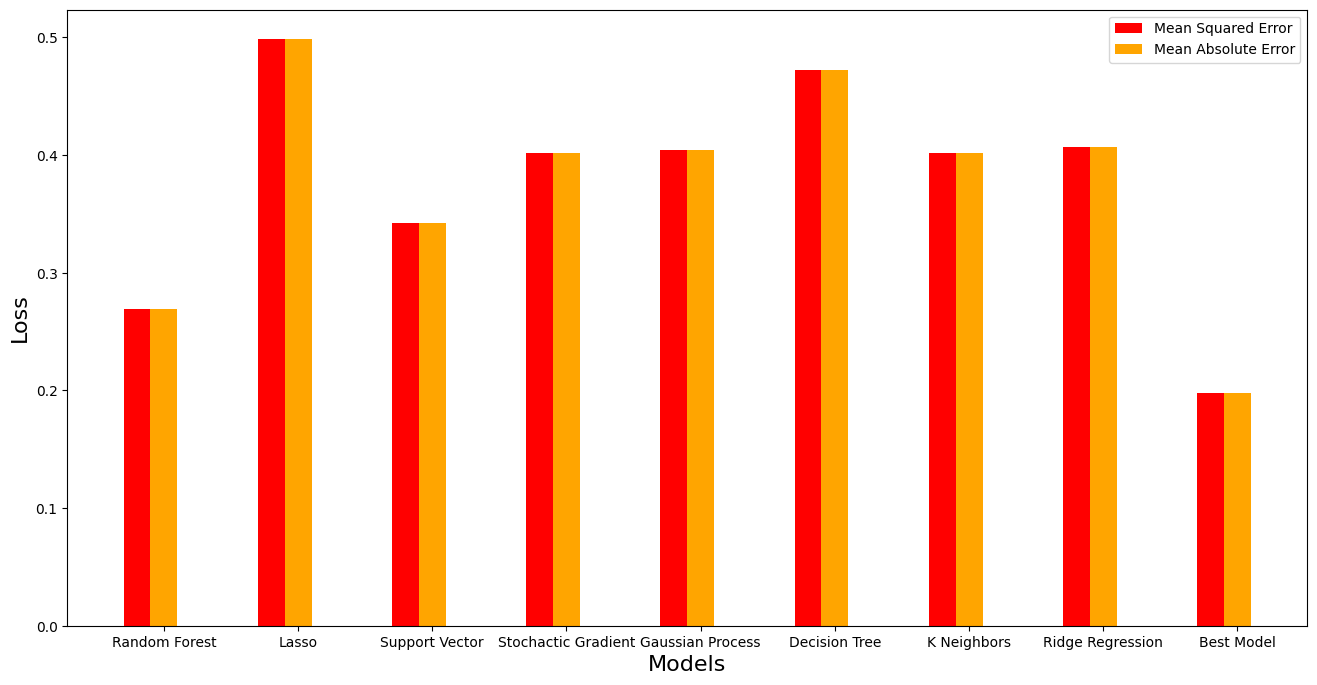

In [ ]:
#Plotting Losses od different models

barwidth = 0.2
import matplotlib.pyplot as plt
fig = plt.subplots(figsize = (16,8))
br1 = np.arange(len(ms))
plt.bar(np.arange(len(ms)), ms, color='red', width=barwidth, label='Mean Squared Error')
br2 = [x + barwidth for x in br1]
plt.bar(br2, ma, color='orange', width=barwidth, label='Mean Absolute Error')
plt.xlabel('Models', fontsize=16)
plt.ylabel('Loss', fontsize=16)
models = ['Random Forest', 'Lasso', 'Support Vector', 'Stochactic Gradient', 'Gaussian Process', 'Decision Tree', 'K Neighbors', 'Ridge Regression', 'Best Model']
plt.xticks([r + barwidth for r in range(len(ms))], models)
plt.legend()
plt.show()

In [ ]:
# sns.set()
# sns.pairplot(train,height = 5 ,kind ='scatter',diag_kind='kde')
# plt.show()

In [ ]:
top10 = train.nlargest(10,'price')
plt.figure(figsize=(20,8))
plt.bar(top10['brand'], top10['price'],color='gold',alpha=0.6)
plt.ylabel('Price', fontsize = 10)
plt.xlabel("Brand", fontsize = 10)
plt.title("Top 10 Expensive Laptop Brands", fontsize = 20)